In [1]:
import pandas as pd
import regex
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [2]:
df = pd.read_csv('../outputs/uncleaned_pl_scrape.csv', thousands=',')
df.head(10)

,ID,Name,Nationality,Date Of Birth,Height,Position,Appearances,Wins,Losses,Saves,...,Goals with left foot,Hit woodwork,Goals per match,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Big chances missed,Club
0,1,David Seaman,England,19/09/1963,193cm,Goalkeeper,344,171,73,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Alan Miller,England,29/03/1970,191cm,Goalkeeper,25,5,13,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Tony Adams,England,10/10/1966,191cm,Defender,255,132,56,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Colin Pates,England,10/08/1961,183cm,Defender,7,4,2,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Gavin McGowan,England,16/01/1976,180cm,Defender,6,2,4,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Pal Lydersen,Norway,10/09/1965,183cm,Defender,8,0,5,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Steve Morrow,Northern Ireland,02/07/1970,183cm,Defender,60,26,21,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,David O'Leary,Ireland,02/05/1958,186cm,Defender,21,7,7,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Steve Bould,England,16/11/1962,193cm,Defender,196,89,49,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Scott Marshall,Scotland,01/05/1973,185cm,Defender,26,10,11,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
x = []
y = []

for col in df.columns:
    na_count = df[col].isna().sum()
    x.append(col)
    y.append(0 if na_count == 0 else round(na_count/len(df[col])*100))

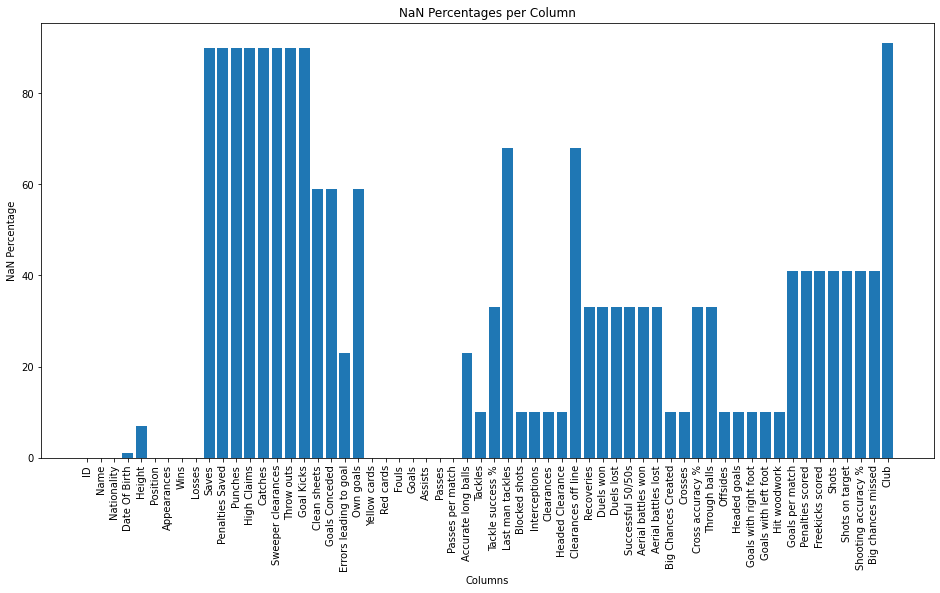

In [4]:
fig, ax = plt.subplots(1,1 )
fig.set_size_inches(16, 8)
ax.bar(range(len(x)), y, )
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation='vertical', fontsize=10)
ax.set_title("NaN Percentages per Column")
ax.set_xlabel("Columns")
ax.set_ylabel("NaN Percentage")
plt.show()

In [5]:
new_names = {col: col.title() for col in df.columns}
df = df.rename(columns=new_names)

df['Goals Per Match'] = (df['Goals'] / df['Appearances']).round(2).fillna(0)
df['Date Of Birth'] = df['Date Of Birth'].fillna("DOB Not Available").apply(
    lambda x: (x if '(' not in x else regex.sub(r' \(\d+\)', '', x)))
df['Height (cm)'] = df['Height'].apply(
    lambda x: int(x[:-2]) if not pd.isnull(x) else float('NaN'))
del df['Height']
df['Club'] = df['Club'].fillna('No Current Club')

float_columns = df.select_dtypes(include=[np.float]).columns
actual_float_columns = ["Goals Per Match", "Passes Per Match"]
int_columns = [col for col in float_columns if col not in actual_float_columns]
percent_columns = list(filter(lambda x: '%' in x, df.columns))

df[percent_columns] = df[percent_columns].apply(lambda x: [int(p[:-1]) if not pd.isnull(p) else float('NaN') for p in x ])
df[int_columns] = df[int_columns].astype('Int64')


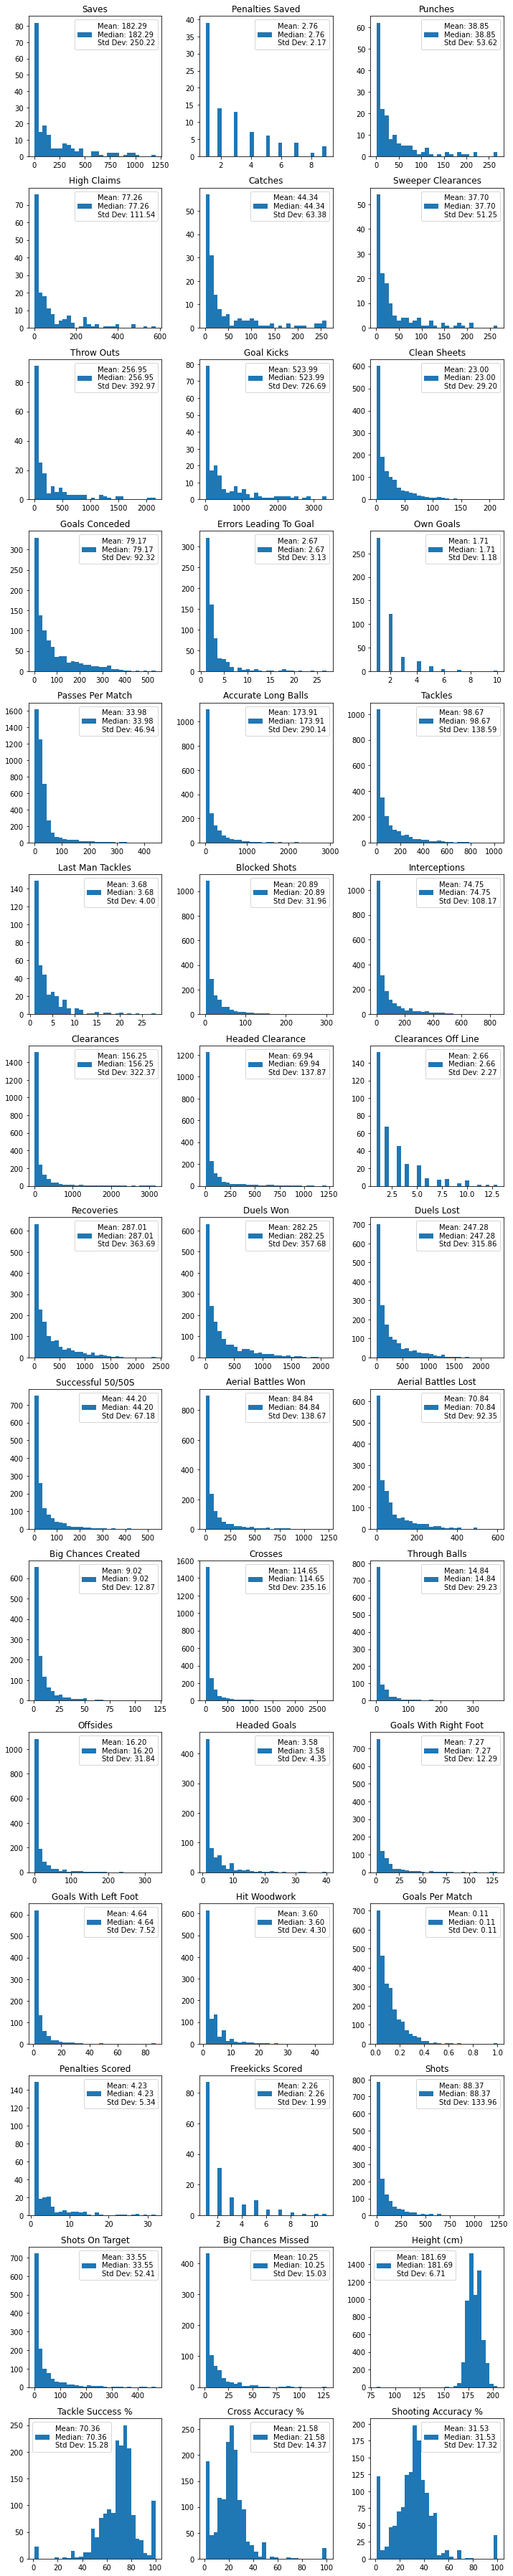

In [6]:
N_COLUMNS = 3

columns = [*float_columns, *percent_columns]

fig, ax = plt.subplots(len(float_columns)//N_COLUMNS + 1, N_COLUMNS, figsize=(10, 50))

for i, col_name in enumerate(columns):
    row = i//N_COLUMNS
    col = i % N_COLUMNS


    X = list(filter(lambda x: x > 0, df[col_name].dropna().tolist()))
    mean = np.mean(X)
    median = np.mean(X)
    stddev = np.std(X)

    ax[row, col].hist(X, bins=30)
    ax[row, col].legend([f"Mean: {mean:.2f}\nMedian: {median:.2f}\nStd Dev: {stddev:.2f}"])
    ax[row, col].set_title(col_name)
plt.tight_layout()
plt.show()


In [7]:
df.head(10)

,Id,Name,Nationality,Date Of Birth,Position,Appearances,Wins,Losses,Saves,Penalties Saved,...,Hit Woodwork,Goals Per Match,Penalties Scored,Freekicks Scored,Shots,Shots On Target,Shooting Accuracy %,Big Chances Missed,Club,Height (cm)
0,1,David Seaman,England,19/09/1963,Goalkeeper,344,171,73,6,0,...,<NA>,0.00,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,No Current Club,193
1,2,Alan Miller,England,29/03/1970,Goalkeeper,25,5,13,0,0,...,<NA>,0.00,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,No Current Club,191
2,3,Tony Adams,England,10/10/1966,Defender,255,132,56,<NA>,<NA>,...,0,0.05,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,No Current Club,191
3,4,Colin Pates,England,10/08/1961,Defender,7,4,2,<NA>,<NA>,...,0,0.00,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,No Current Club,183
4,5,Gavin McGowan,England,16/01/1976,Defender,6,2,4,<NA>,<NA>,...,0,0.00,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,No Current Club,180
5,6,Pal Lydersen,Norway,10/09/1965,Defender,8,0,5,<NA>,<NA>,...,0,0.00,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,No Current Club,183
6,7,Steve Morrow,Northern Ireland,02/07/1970,Defender,60,26,21,<NA>,<NA>,...,0,0.02,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,No Current Club,183
7,8,David O'Leary,Ireland,02/05/1958,Defender,21,7,7,<NA>,<NA>,...,0,0.00,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,No Current Club,186
8,9,Steve Bould,England,16/11/1962,Defender,196,89,49,<NA>,<NA>,...,0,0.01,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,No Current Club,193
9,10,Scott Marshall,Scotland,01/05/1973,Defender,26,10,11,<NA>,<NA>,...,0,0.04,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,No Current Club,185


In [ ]:
json_string = df.to_json(orient='records')
player_list = json.loads(json_string)

out_list = {}

for player in player_list:
    out_list[player['Name']] = {key: value for (key, value) in player.items() if key != 'Name' }

with open('../outputs/cleaned_pl_scrape.json', 'w') as f:
    json.dump(out_list, f, indent=2) 